In [9]:
# Import required libraries
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("Titanic-Dataset.csv")

# Quick look at data
print(df.head())
print(df.info())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [10]:
# Check missing values
print(df.isnull().sum())

# Drop rows with missing values (or you can fill with mean/median/mode)
df = df.dropna()

print("Shape after removing nulls:", df.shape)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Shape after removing nulls: (183, 12)


In [11]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in df.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print(df.head())


    PassengerId  Survived  Pclass  Name  Sex   Age  SibSp  Parch  Ticket  \
1             2         1       1    49    0  38.0      1      0     109   
3             4         1       1    70    0  35.0      1      0      31   
6             7         0       1   112    1  54.0      0      0      55   
10           11         1       3   148    0   4.0      1      1     120   
11           12         1       1    27    0  58.0      0      0      26   

       Fare  Cabin  Embarked  
1   71.2833     72         0  
3   53.1000     48         2  
6   51.8625    117         2  
10  16.7000    131         2  
11  26.5500     43         2  


In [12]:
X = df.drop("Survived", axis=1)
y = df["Survived"]

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (183, 11)
Target shape: (183,)


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [15]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predictions
y_pred_dt = dt_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Decision Tree results
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

# Random Forest results
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Decision Tree Accuracy: 0.6756756756756757
              precision    recall  f1-score   support

           0       0.50      0.50      0.50        12
           1       0.76      0.76      0.76        25

    accuracy                           0.68        37
   macro avg       0.63      0.63      0.63        37
weighted avg       0.68      0.68      0.68        37

Random Forest Accuracy: 0.8378378378378378
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        12
           1       0.88      0.88      0.88        25

    accuracy                           0.84        37
   macro avg       0.81      0.81      0.81        37
weighted avg       0.84      0.84      0.84        37



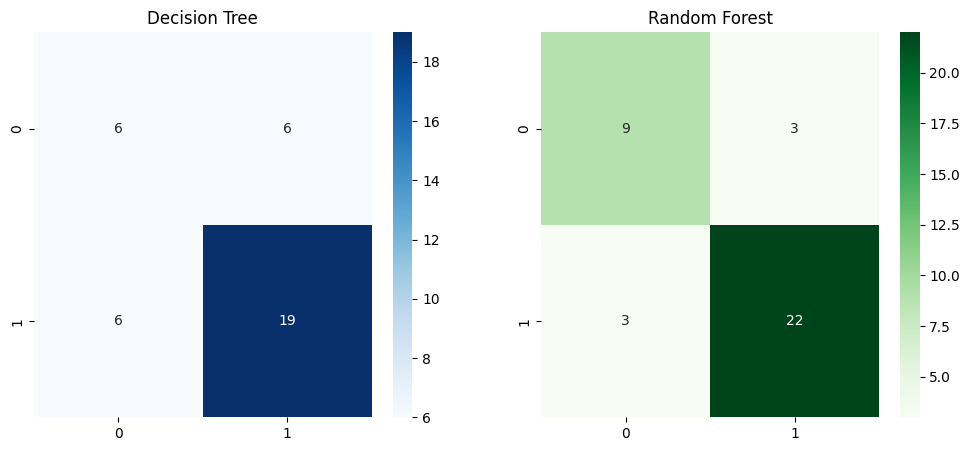

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt="d", cmap="Blues")
plt.title("Decision Tree")

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Greens")
plt.title("Random Forest")

plt.show()